In [12]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv("./dataset/BBC_Noticias.csv")

In [13]:
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

reloaded_model = tf.saved_model.load(saved_model_path)

In [36]:
examples = df['Texto']
reloaded_results = tf.math.softmax(reloaded_model(tf.constant(examples)))

In [41]:
resultados_np = reloaded_results.numpy()

In [42]:
num_unos = np.sum(resultados_np == 1)
num_ceros = np.sum(resultados_np == 0)
print(f"Número de 1's: {num_unos}")
print(f"Número de 0's: {num_ceros}")

Número de 1's: 34
Número de 0's: 0


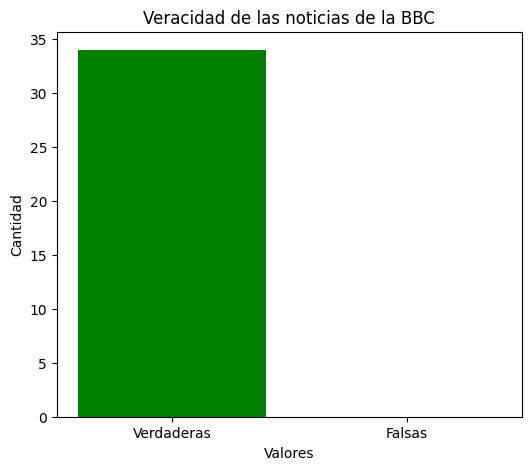

In [46]:
plt.figure(figsize=(6, 5))
plt.bar(['Verdaderas', 'Falsas'], [num_unos, num_ceros], color=['green', 'red'])
plt.title('Veracidad de las noticias de la BBC')
plt.xlabel('Valores')
plt.ylabel('Cantidad')
plt.show()